In [1]:
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from pydng.core import RPICAM2DNG
from io import BytesIO
from matplotlib import pyplot as plt
import numpy as np

<class 'numpy.ndarray'>
dict_keys(['Image ImageWidth', 'Image ImageLength', 'Image Make', 'Image Model', 'Image XResolution', 'Image YResolution', 'Image ResolutionUnit', 'Image DateTime', 'Image YCbCrPositioning', 'Image ExifOffset', 'Thumbnail ImageWidth', 'Thumbnail ImageLength', 'Thumbnail Compression', 'Thumbnail XResolution', 'Thumbnail YResolution', 'Thumbnail ResolutionUnit', 'Thumbnail JPEGInterchangeFormat', 'Thumbnail JPEGInterchangeFormatLength', 'EXIF ExposureTime', 'EXIF ExposureProgram', 'EXIF ISOSpeedRatings', 'EXIF ExifVersion', 'EXIF DateTimeOriginal', 'EXIF DateTimeDigitized', 'EXIF ComponentsConfiguration', 'EXIF ShutterSpeedValue', 'EXIF BrightnessValue', 'EXIF MeteringMode', 'EXIF Flash', 'EXIF MakerNote', 'EXIF FlashPixVersion', 'EXIF ColorSpace', 'EXIF ExifImageWidth', 'EXIF ExifImageLength', 'Interoperability InteroperabilityIndex', 'EXIF InteroperabilityOffset', 'EXIF ExposureMode', 'EXIF WhiteBalance', 'JPEGThumbnail'])
dict_keys(['unk', 'ev', 'mlux', 'exp', 

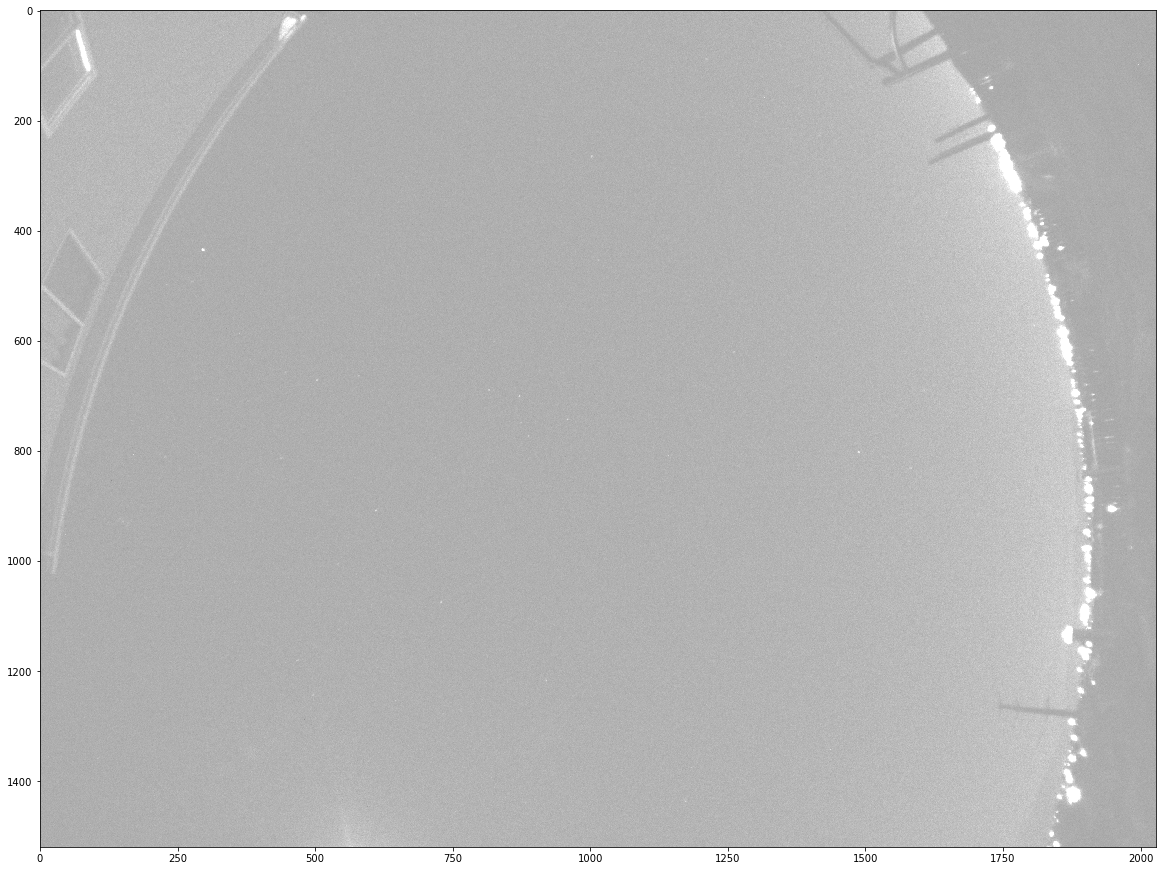

In [2]:
image_file = 'testa_1202.jpg'
with open(image_file, 'rb') as fh:
    buf = BytesIO(fh.read())
rpicam = RPICAM2DNG()
raw = rpicam.__extractRAW__(buf)
raw = np.array(raw, dtype=np.float)
print(type(raw))
print(rpicam.__exif__.keys())
print(rpicam.maker_note.keys())

print(raw.shape, raw.size, raw.dtype)

carray = raw[::2,::2] + raw[1::2,::2] + raw[::2,1::2] + raw[1::2,1::2]
r,c = carray.shape
print("Max is", np.max(carray), "min", np.min(carray))
carray = carray
print(carray[r//2-5:r//2+5,c//2-5:c//2+5])

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
ax.imshow(carray, cmap='gray', interpolation='none', vmin=100, vmax=1500)

# ax1 = fig.add_subplot(221)
# ax1.imshow(raw[::2,::2], cmap='gray', interpolation='none', vmin=100, vmax=500)
# ax2 = fig.add_subplot(222)
# ax2.imshow(raw[1::2,::2], cmap='gray', interpolation='none', vmin=100, vmax=500)
# ax3 = fig.add_subplot(223)
# ax3.imshow(raw[::2,1::2], cmap='gray', interpolation='none', vmin=100, vmax=500)
# ax4 = fig.add_subplot(224)
# ax4.imshow(raw[1::2,1::2], cmap='gray', interpolation='none', vmin=100, vmax=500)

plt.show()

NameError: name 'img1' is not defined

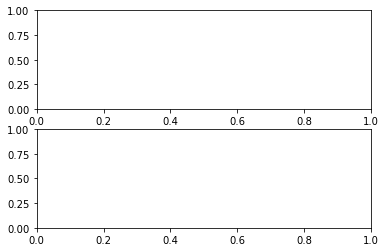

In [3]:

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(carray)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors


#matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
#matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], carray, carray, keypoints1, keypoints1, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()